# ZestChef AI Kitchen Assistant 🍳🤖

Welcome to the ZestChef AI Kitchen Assistant demo for the HelloFresh GenAI Competition!

This interactive tool uses Generative AI to help HelloFresh users make the most of their leftover ingredients.  
- **Enter whatever you have at home**—ZestChef will match your ingredients to HelloFresh recipes, show you how close you are to making each meal, suggest smart swaps, and provide step-by-step instructions or cooking videos.
- The goal: **Reduce food waste, stretch your budget, and turn HelloFresh into your daily kitchen companion.**
- This demo features 7 HelloFresh recipes as a proof of concept, but the full model can scale to our entire recipe library.

Along the way, ZestChef collects valuable data on common leftovers, popular recipes, and most-watched videos—helping HelloFresh continuously improve and innovate.

*Try it out below and see how ZestChef can transform everyday cooking!*


## Install Required Libraries

In [1]:

!{sys.executable} -m pip install fuzzywuzzy
!{sys.executable} -m pip install ipywidgets
!{sys.executable} -m pip install gradio
!{sys.executable} -m pip install python-dotenv openai




'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.
'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.
'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.
'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


## Imports

In [2]:
import sys              
import re                
from fuzzywuzzy import fuzz       
import ipywidgets as widgets      
from IPython.display import display, clear_output  
import textwrap



c:\Users\JohnReed\AppData\Local\Programs\Python\Python313\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Step X: Integrating OpenAI GPT for Conversational Recipe Assistant
Now we extend the demo to use GPT-3.5 for natural-language cooking help.

In [3]:
from dotenv import load_dotenv
import os
from openai import OpenAI

load_dotenv()
client = OpenAI()
print("Key loaded? ", bool(os.getenv("OPENAI_API_KEY")))


Key loaded?  True


## The creation of our AI Embassador ZestChef

Note: Black background so not clear


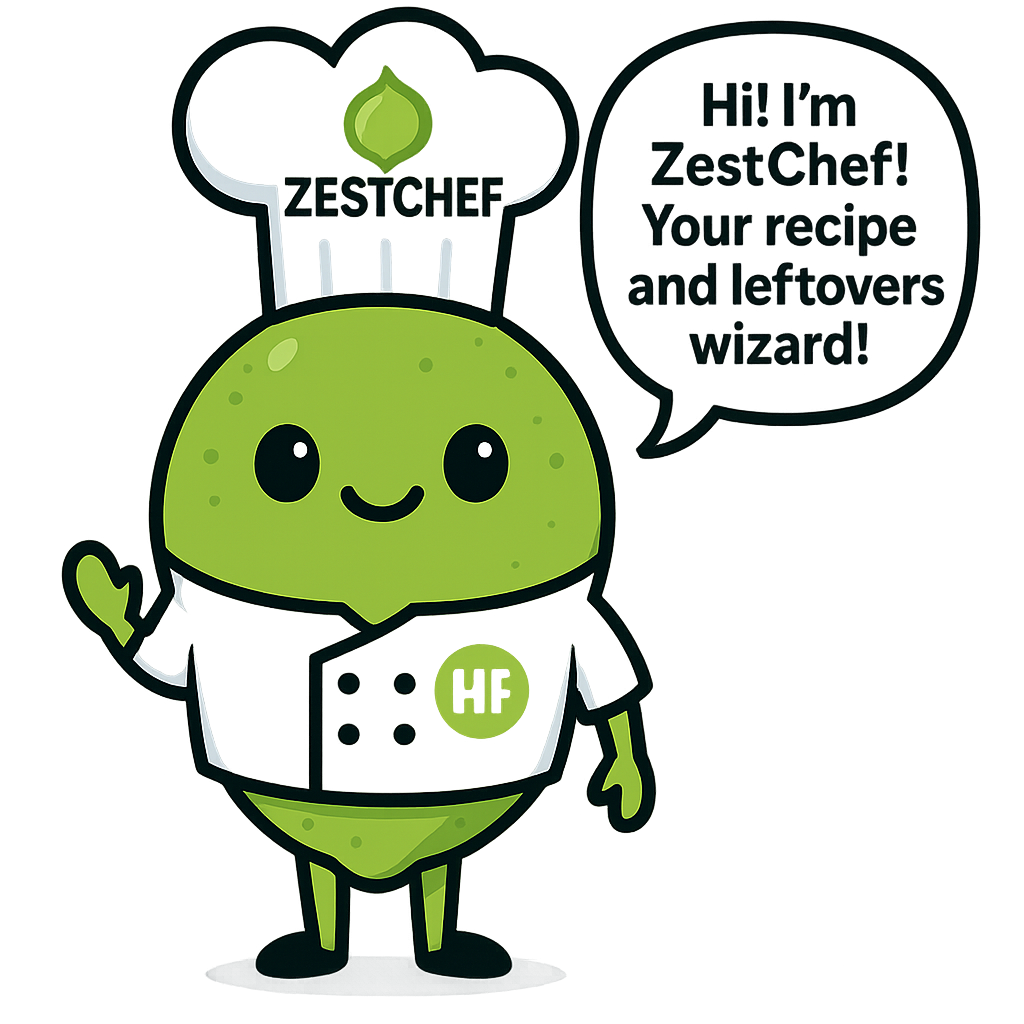

In [4]:
from IPython.display import Image, display

# Show ZestChef mascot with speech bubble
display(Image("Zest_Chef.png", width=180))


## Recipe Dataset (Demo Version)

Below are the ingredient lists for 7 HelloFresh recipes used in this demo, each featuring chicken as the primary protein. In a production model, this dataset would include all HelloFresh recipes.

Each recipe also lists a set of **Primary Ingredients**. These ingredients are considered most important to the dish (such as chicken, potatoes, or a key vegetable). The matching algorithm applies a **2.5x weight** to primary ingredients compared to secondary ones (like seasonings or sauces). For example, having potatoes available is considered much more important than having dried oregano. These weights and ajustments would obviously be more thought out but decided on this value for demo.

This weighted approach ensures recipe suggestions are relevant and practical for users, reflecting the real-life importance of each ingredient.

Getting this to work for whole Hello Fresh library is a simple as doing this for all recipes.


In [5]:
recipes = [
    {
        "name": "Mozzarella-Crusted Chicken",
        "primary_ingredients": [
            "Chicken Breasts",
            "Mozzarella Cheese",
            "Roma Tomato",
            "Yukon Gold Potatoes"
        ],
        "ingredients": {
            "Chicken Breasts": "12 oz",
            "Mozzarella Cheese": "1/2 cup",
            "Roma Tomato": "2",
            "Panko Breadcrumbs": "1/2 cup",
            "Paprika": "1 tsp",
            "Yukon Gold Potatoes": "12 oz",
            "Dried Oregano": "1 tsp",
            "Olive Oil": "4 tsp",
            "Salt": "to taste",
            "Pepper": "to taste"
        },
        "utensils": [
            "Cutting Board",
            "Baking Sheet",
            "Bowl",
            "Baking Dish"
        ],
        "instructions": [
            "Wash and dry all produce. Preheat oven to 425°F (220°C). Cut potatoes into 1/2-inch-thick wedges. Core and quarter tomatoes.",
            "Toss potatoes on one side of a foil-lined baking sheet with a drizzle of olive oil and a pinch of salt and pepper. On the other side, toss tomatoes with olive oil, salt, and pepper. Roast until potatoes are crispy and tomatoes are soft, 25-30 minutes, tossing halfway.",
            "Mix panko, oregano, paprika, mozzarella, olive oil, salt, and pepper in a small bowl.",
            "Season chicken breasts with salt and pepper, rub with olive oil, and place on a second baking sheet.",
            "Add a layer of panko crust to top of each chicken breast, pressing to adhere. Pile topping high (leftovers OK).",
            "Bake chicken until cooked through and topping is golden, about 20 minutes. Serve with potato wedges and roasted tomatoes."
        ],
        "servings": 2,
        "url": "https://www.hellofresh.com/recipes/mozzarella-crusted-chicken-5845b27b2e69d7646110f1c2",
        "image_url": "Mozzarella_Crusted_Chicken.png"
    },
    {
        "name": "Onion Crunch Chicken",
        "primary_ingredients": [
            "Chicken Cutlets",
            "Potatoes",
            "Green Beans",
            "Crispy Fried Onions"
        ],
        "ingredients": {
            "Potatoes": "12 oz",
            "Crispy Fried Onions": "1 unit",
            "Monterey Jack Cheese": "1/4 cup",
            "Chicken Cutlets": "10 oz",
            "Honey Dijon Dressing": "1.5 oz",
            "Green Beans": "6 oz",
            "Sour Cream": "1.5 tbsp",
            "Salt": "to taste",
            "Pepper": "to taste",
            "Olive Oil": "as needed",
            "Butter": "as needed"
        },
        "utensils": [
            "Small Bowl",
            "Medium Pot",
            "Strainer",
            "Paper Towel",
            "Baking Sheet",
            "Potato Masher"
        ],
        "instructions": [
            "Preheat oven to 425°F (220°C). Dice potatoes into 1/2-inch pieces. Trim green beans if necessary. Crush crispy fried onions and mix with Monterey Jack cheese in a small bowl. Reserve 1 tbsp dressing in a second bowl.",
            "Place potatoes in a medium pot with salted water. Boil until tender, 15-20 min. Reserve 1/2 cup cooking liquid, drain, and return potatoes to pot. Cover.",
            "Pat chicken dry, season with salt and pepper, and place on baking sheet. Spread tops with reserved dressing. Add onion crust to tops of chicken, pressing to adhere.",
            "On the other side of the baking sheet, toss green beans with olive oil, salt, and pepper. Roast until chicken is cooked through and green beans are browned and tender, 15-20 min.",
            "Mash potatoes with sour cream, 2 tbsp butter, and salt until smooth, adding reserved liquid as needed. Season to taste.",
            "Divide mashed potatoes, green beans, and chicken between plates. Serve with remaining dressing on the side."
        ],
        "servings": 2,
        "url": "https://www.hellofresh.com/recipes/onion-crunch-chicken-680f78e8cc2d98a6872f8246",
        "image_url": "Onion_Crunch_Chicken.png",
        "youtube_url": "https://www.youtube.com/watch?v=XLlyvVacY30",
        "video_segments": [
        {
            "topic": "chicken preparation",
            "start": "3:09",
            "end": "4:35",
            "description": "Prepping and roasting the chicken cutlets with the crispy onion crust."
        }
    ]
    },
    {
        "name": "Crispy Chicken Tenders with BBQ Sauce",
        "primary_ingredients": [
            "Chicken Cutlets",
            "Potatoes",
            "Mixed Greens",
            "Tomato"
        ],
        "ingredients": {
            "Potatoes": "12 oz",
            "Tomato": "1",
            "Flour": "1/2 cup",
            "Sour Cream": "1.5 tbsp",
            "Balsamic Vinegar": "5 tsp",
            "Mixed Greens": "2 oz",
            "BBQ Sauce": "4 tbsp",
            "Panko Breadcrumbs": "1/2 cup",
            "Dijon Mustard": "2 tsp",
            "Chicken Cutlets": "10 oz",
            "Salt": "to taste",
            "Pepper": "to taste",
            "Olive Oil": "as needed",
            "Sugar": "as needed",
            "Cooking Oil": "as needed"
        },
        "utensils": [
            "Baking Sheet",
            "Whisk",
            "Large Pan",
            "Paper Towel",
            "Medium Bowl"
        ],
        "instructions": [
            "Adjust rack to top position and preheat oven to 425°F (220°C). Wash and dry produce. Cut potatoes into 1/2-inch-thick wedges.",
            "Toss potato wedges on a baking sheet with oil, salt, and pepper. Roast on top rack until browned and tender, 20-25 min. While potatoes roast, cut tomato into 1/2-inch-thick wedges.",
            "Place flour in a shallow bowl and season with salt and pepper. In a separate bowl, whisk together sour cream and 2 tbsp water. In a third bowl, place panko.",
            "In a medium bowl, whisk together mustard, half the vinegar, 1/4 tsp sugar, and olive oil until combined.",
            "Pat chicken dry and slice lengthwise into 1-inch-thick strips. Season with salt and pepper. Coat in flour, then sour cream mixture, then panko.",
            "Heat a 1/2-inch layer of oil in a large pan over medium-high. Fry chicken until golden and cooked through, 3-5 min per side. Transfer to a paper-towel-lined plate; season with salt.",
            "Add mixed greens, tomato, salt, and pepper to vinaigrette; toss.",
            "Divide chicken tenders, potato wedges, and salad between plates. Serve with BBQ sauce on the side."
        ],
        "servings": 2,
        "url": "https://www.hellofresh.com/recipes/crispy-chicken-tenders-with-bbq-sauce-67d7fa5b6ec352636ca1903e",
        "image_url": "Crispy_Chicken_Tenders_With_BBQ_Sauce.png",
    },
    {
        "name": "Crispy Fried Chicken Bites & Gravy",
        "primary_ingredients": [
            "Chopped Chicken Breast",
            "Potatoes",
            "Coleslaw Mix",
            "Scallions"
        ],
        "ingredients": {
            "Flour": "1 tbsp",
            "White Wine Vinegar": "5 tsp",
            "Fry Seasoning": "1 tbsp",
            "Potatoes": "2 medium",
            "Tempura Batter": "82 g",
            "Coleslaw Mix": "4 oz",
            "Scallions": "2",
            "Mayonnaise": "2 tbsp",
            "Chicken Stock Concentrate": "1 unit",
            "Chopped Chicken Breast": "10 oz",
            "Sour Cream": "1.5 tbsp",
            "Salt": "to taste",
            "Pepper": "to taste",
            "Cooking Oil": "as needed",
            "Sugar": "as needed",
            "Butter": "as needed"
        },
        "utensils": [
            "Medium Bowl",
            "Large Pan",
            "Whisk",
            "Small Bowl",
            "Potato Masher",
            "Paper Towel"
        ],
        "instructions": [
            "Wash and dry produce. Peel potatoes if desired; dice into 1/2-inch pieces. Thinly slice scallions, separating whites from greens. Place potatoes in a pot with salted water, bring to a boil, and cook until tender, 10-12 min. Reserve 1/4 cup cooking liquid, then drain. Return potatoes to pot and cover.",
            "While potatoes cook, drain chicken and season with Fry Seasoning, salt, and pepper. In a medium bowl, combine tempura batter mix, salt, and pepper.",
            "In another bowl, toss coleslaw mix, mayonnaise, half the vinegar, 1 tsp sugar, salt, and pepper until combined. Set aside.",
            "Melt 1 tbsp butter in a large pan over medium heat. Add scallion whites; cook 30 sec. Add flour and stir. Whisk in stock concentrate and 1/2 cup water. Simmer until thick, 1-2 min. Season with salt and pepper. Transfer to a bowl and keep warm.",
            "To pot with potatoes, add sour cream and 1 tbsp butter; mash until smooth, adding reserved liquid as needed. Season with salt and pepper. Keep covered.",
            "Heat 1/2-inch oil in the pan used for gravy over medium-high. Coat seasoned chicken in tempura mixture. Fry until golden and cooked through, 4-6 min. Transfer to paper-towel-lined plate.",
            "Divide chicken, coleslaw, and mashed potatoes between plates. Create a well in mashed potatoes and fill with gravy. Top with scallion greens and serve."
        ],
        "servings": 2,
        "url": "https://www.hellofresh.com/recipes/crispy-fried-chicken-bites-and-gravy-67d7e76018d6e477003fc8dc",
        "image_url": "Crispy_Chicken_Bites_And_Gravy.png"
    },
    {
        "name": "Tex-Mex-Style Chicken",
        "primary_ingredients": [
            "Chicken Cutlets",
            "Jasmine Rice",
            "Tomato",
            "Chickpeas",
            "Scallions"
        ],
        "ingredients": {
            "Scallions": "2",
            "Tomato": "1",
            "Chickpeas": "1 can",
            "Tex-Mex Paste": "1 unit",
            "Jasmine Rice": "1/2 cup",
            "Chicken Cutlets": "10 oz",
            "Fajita Spice Blend": "1 tbsp",
            "Sour Cream": "1.5 tbsp",
            "Salt": "to taste",
            "Pepper": "to taste",
            "Cooking Oil": "as needed",
            "Butter": "as needed"
        },
        "utensils": [
            "Strainer",
            "Small Pot",
            "Paper Towel",
            "Large Pan",
            "Baking Sheet",
            "Small Bowl",
            "Aluminum Foil"
        ],
        "instructions": [
            "Adjust rack to middle position and preheat oven to 425°F (220°C). Wash and dry produce. Thinly slice scallions (whites and greens separated). Dice tomato. Drain and rinse chickpeas.",
            "Heat 1 tbsp butter in a small pot over medium-high. Add scallion whites and half the Tex-Mex paste, cook until softened (30-60 sec). Stir in rice and 3/4 cup water, bring to boil, cover and reduce heat to low. Cook 15-18 min. Keep covered until Step 4.",
            "Pat chicken dry with paper towels; season with fajita spice blend and salt. Heat oil in large pan over medium-high. Sear chicken until browned and cooked through, 3-5 min per side. Transfer to a cutting board, tent with foil.",
            "Fluff rice, stir in tomato and chickpeas. Season with salt and pepper.",
            "In a small bowl, combine sour cream and scallion greens. Add water 1 tsp at a time until drizzling consistency. Season with salt and pepper.",
            "Thinly slice chicken crosswise. Divide rice between bowls, top with chicken, and drizzle with crema."
        ],
        "servings": 2,
        "url": "https://www.hellofresh.com/recipes/tex-mex-style-chicken-6706bd3c10eac7b3edfebd52",
        "image_url": "Tex_Mex_Style_Chicken.png"
    },
    {
        "name": "Hoisin-Glazed Chicken Cutlet",
        "primary_ingredients": [
            "Chicken Cutlets",
            "Green Beans",
            "White Rice",
            "Scallions"
        ],
        "ingredients": {
            "Scallions": "2",
            "Green Beans": "6 oz",
            "Hoisin Sauce": "2 tbsp",
            "Garlic Powder": "1 tsp",
            "White Rice": "1/2 cup",
            "Chicken Cutlets": "10 oz",
            "Mayonnaise": "2 tbsp",
            "Sriracha": "1 tsp",
            "Ponzu Sauce": "6 ml",
            "Sesame Seeds": "1 tbsp",
            "Salt": "to taste",
            "Pepper": "to taste",
            "Cooking Oil": "1 tbsp",
            "Butter": "1 tbsp"
        },
        "utensils": [
            "Small Bowl",
            "Small Pot",
            "Paper Towel",
            "Large Pan",
            "Baking Sheet"
        ],
        "instructions": [
            "Preheat oven to 450°F (230°C). Wash and dry produce. Thinly slice scallions (whites and greens separated). Trim green beans if needed. In a microwave-safe bowl, combine hoisin, 1/4 tsp garlic powder, and 1 tbsp water. Microwave 30 sec.",
            "Heat a drizzle of oil in a small pot over medium-high. Add scallion whites, cook 1 min. Stir in rice, 3/4 cup water, and a big pinch of salt. Bring to a boil, cover, reduce heat to low, and cook until tender, 15-18 min. Keep covered off heat.",
            "Pat chicken dry, season with salt and pepper. Heat oil in large pan over medium-high. Sear chicken until browned and cooked through, 3-5 min per side. Add half the hoisin glaze, turning chicken to coat. Transfer to a cutting board; rest 5 min, then slice crosswise.",
            "Toss green beans with oil, salt, and pepper. Roast on baking sheet until tender, 10-12 min. Toss with ponzu and half the sesame seeds.",
            "In a small bowl, mix mayonnaise, remaining garlic powder, and as much sriracha as you like. Stir in water 1 tsp at a time to drizzling consistency.",
            "Fluff rice with fork; stir in 1 tbsp butter and season with salt and pepper. Divide rice, green beans, and chicken between plates. Drizzle chicken with remaining hoisin glaze, and everything with sriracha mayo. Top with scallion greens and remaining sesame seeds."
        ],
        "servings": 2,
        "url": "https://www.hellofresh.com/recipes/hoisin-glazed-chicken-cutlet-670ff3515e99f1b696435126",
        "Image_url": "Hoisin_Glazed_Chicken_Cutlet.png"
    },
    {
        "name": "Hot Honey Chicken Cutlet",
        "primary_ingredients": [
            "Chicken Cutlets",
            "Carrots",
            "Jasmine Rice",
            "Scallions",
            "Ginger"
        ],
        "ingredients": {
            "Carrots": "12 oz",
            "Scallions": "2",
            "Ginger": "1 thumb",
            "Lime": "1",
            "Cilantro": "1/4 oz",
            "Jasmine Rice": "1/2 cup",
            "Chicken Cutlets": "10 oz",
            "Sesame Seeds": "1 tbsp",
            "Sesame Oil": "1 tbsp",
            "Chicken Stock Concentrate": "1 unit",
            "Hot Honey": "1/2 oz",
            "Cooking Oil": "2 tsp",
            "Butter": "2 tbsp",
            "Salt": "to taste",
            "Pepper": "to taste"
        },
        "utensils": [
            "Peeler",
            "Zester",
            "Baking Sheet",
            "Small Pot",
            "Paper Towel",
            "Large Pan"
        ],
        "instructions": [
            "Preheat oven to 425°F (220°C). Wash and dry produce. Trim, peel, and cut carrots on a diagonal into 1/2-inch-thick pieces. Thinly slice scallions (separate whites/greens). Mince ginger and cilantro. Zest and quarter lime.",
            "Toss carrots with oil, salt, and pepper on one side of a baking sheet. Roast on top rack for 12 min.",
            "In a small pot, combine rice, 3/4 cup water, and a pinch of salt. Bring to a boil, cover, and simmer until tender, 15-18 min. Keep covered off heat.",
            "Pat chicken dry, season with salt and pepper. Heat oil in large pan over medium-high. Sear chicken 3-5 min per side, until cooked through. (If using pork, roast after searing.) Rest on cutting board.",
            "Heat half the sesame oil and 1/2 tbsp butter in pan over medium-high. Add scallion whites and half the ginger; cook 1 min. Stir in stock concentrate, hot honey, and 1/4 cup water. Simmer 1-2 min. Remove from heat, stir in 1 tbsp butter. Season with salt and pepper.",
            "Fluff rice with fork; stir in cilantro, lime zest, juice from half the lime, and 1/2 tbsp butter. Season with salt and pepper.",
            "Stir scallion greens and any chicken resting juices into sauce. Slice chicken crosswise. Divide chicken, rice, and carrots between plates. Spoon sauce over chicken. Serve with lime wedges."
        ],
        "servings": 2,
        "url": "https://www.hellofresh.com/recipes/hot-honey-chicken-cutlet-66578fbb66fcbf26f0fd9bae",
        "image_url": "Hot_Honey_Chicken_Cutlet.png"
    }
]



## Pantry Items (Matching Logic)

This is the list of **pantry items** (common staples like salt, pepper, oil, and butter) used by the matching algorithm. These items are *not* included when calculating the similarity score between user ingredients and recipes.

Without this step, the algorithm could give low match scores to users who only list main ingredients (e.g., “chicken, rice, carrots”)—since most recipes also require basic staples not always mentioned by users. By excluding pantry items from the matching process, the model focuses on meaningful ingredients and delivers more accurate results.

The last two lines of code in the matching cell specifically remove pantry items from both the input and the comparison, ensuring the best possible experience for users.


In [6]:
PANTRY_ITEMS = {"salt", "pepper", "olive oil","cooking oil", "oil", "butter", "eggs", "sugar", "flour", "honey", "soy sauce"}

for recipe in recipes:
    recipe['matching_ingredients'] = [
        ing for ing in recipe['ingredients'].keys()
        if ing.lower() not in PANTRY_ITEMS
    ]
    recipe['pantry_ingredients'] = [
        ing for ing in recipe['ingredients'].keys()
        if ing.lower() in PANTRY_ITEMS
    ]
def filter_user_ingredients(user_ingredients, pantry_items=PANTRY_ITEMS):
    cleaned_ings = []
    for ing in user_ingredients:
        clean_ing = ing.strip().lower()
        # Remove trailing words like "for 2" or "for 4 people"
        clean_ing = re.sub(r'for\s*\d+.*', '', clean_ing).strip()
        if clean_ing and clean_ing not in pantry_items:
            cleaned_ings.append(clean_ing)
    return cleaned_ings


## Ingredient Synonyms

These are the synonyms I’ve identified so far. In the full HelloFresh recipe model, this list would be much more extensive to account for all ingredient variations, regional names, and common abbreviations. 

Synonym mapping ensures that different user inputs—like “onion” and “scallion” or “olive oil” and “cooking oil”—are recognized as equivalent during recipe matching. This improves the algorithm’s accuracy and user experience, especially for ingredients with multiple common names.

For best results, continue expanding this list as more recipes and user queries are added.


In [7]:
SYNONYMS = {
    "chicken breast": ["chicken cutlets", "chopped chicken breast"],
    "chicken cutlets": ["chicken breast", "chopped chicken breast"],
    "chopped chicken breast": ["chicken breast", "chicken cutlets"],
    "yukon gold potatoes": ["potatoes"],
    "potatoes": ["yukon gold potatoes"],
    "roma tomato": ["tomato"],
    "tomato": ["roma tomato"],
    "white rice": ["jasmine rice"],
    "jasmine rice": ["white rice"],
    "scallions": ["spring onion", "green onion", "scallion", "onion greens", "onion"],
    "green onion": ["scallions", "spring onion", "scallion", "onion greens", "onion"],
    "spring onion": ["scallions", "green onion", "scallion", "onion"],
    "onion": ["Scallions", "green onion", "onions", "onion greens", "spring onion"],
    "coleslaw mix": ["mixed greens"],
    "mixed greens": ["coleslaw mix", "greens"],
    "olive oil": ["cooking oil"],
    "cooking oil": ["olive oil"],
    "mayonnaise": ["mayo"],
    "mayo": ["mayonnaise"],
    "sour cream": ["creme fraiche"],
    "lime": ["lemon"],
    "cilantro": ["coriander"],
    "paprika": ["smoked paprika"],
    "dried oregano": ["oregano"],
    "cheese": ["mozzarella cheese", "parmesan cheese", "cheddar cheese"],
    "mozzarella cheese": ["cheese"],
    "parmesan cheese": ["cheese"],
    "cheddar cheese": ["cheese"],
    "monterey jack cheese": ["cheese"]
    # Extend as you spot more cases!
}


## Listing the recipes in the database

In [8]:
# Display all recipe names to verify
for idx, recipe in enumerate(recipes, 1):
    print(f"{idx}. {recipe['name']}")


1. Mozzarella-Crusted Chicken
2. Onion Crunch Chicken
3. Crispy Chicken Tenders with BBQ Sauce
4. Crispy Fried Chicken Bites & Gravy
5. Tex-Mex-Style Chicken
6. Hoisin-Glazed Chicken Cutlet
7. Hot Honey Chicken Cutlet


### Ingredient & Serving Extraction

This function parses user prompts to extract both a list of ingredient words and the serving size.

- **Ingredient list** is extracted after keywords like "have", "with", "ingredients", or "using". The text is split by commas or the words "and"/"&".
- **Filtering**: Removes common non-ingredient words and numbers.

**Output:**  
Returns a list of parsed ingredient words and an integer for servings.

Example:  
- Input: `"I have chicken, rice, and carrots for 4"`
- Output: `(['chicken', 'rice', 'carrots'], 4)`


In [9]:
def parse_ingredients(user_text):
    # Lowercase for easier matching
    text = user_text.lower()

    # Look for serving size
    servings_match = re.search(r'(?:servings|for|cooking for)\s*([0-9]+)', text)
    servings = int(servings_match.group(1)) if servings_match else 2

    # Find start of ingredient list
    ingredient_start = 0
    for kw in ["have", "with", "ingredients", "using"]:
        if kw in text:
            ingredient_start = text.index(kw) + len(kw)
            break
    else:
        ingredient_start = 0  # use whole string if no keyword

    ingredient_text = text[ingredient_start:]

    # Split on commas, "and", "&"
    ingredient_text = re.sub(r'\band\b|&', ',', ingredient_text)
    candidate_ingredients = [ing.strip(" .,:;") for ing in ingredient_text.split(",")]

    # Filter out empty or obviously non-ingredient words
    common_words = {"for", "people", "servings", "cooking", "make", "what", "can", "i", "want", ""}
    ingredients = [word for word in candidate_ingredients if word and word not in common_words and not word.isdigit()]

    return ingredients, servings


## Example of previous code

In [10]:
# Try these sample prompts:
print(parse_ingredients("I have broccoli, chicken, and carrots for 3 people"))
print(parse_ingredients("cheese tortelloni and spinach, cooking for 2"))
print(parse_ingredients("with pork, potato, and tomato"))
print(parse_ingredients("What can I make with chicken cutlets, potatoes?"))


(['broccoli', 'chicken', 'carrots for 3 people'], 3)
(['cheese tortelloni', 'spinach', 'cooking for 2'], 2)
(['pork', 'potato', 'tomato'], 2)
(['chicken cutlets', 'potatoes?'], 2)


### Example Prompts

These are sample prompts used to test the recipe matching algorithm.  
Each string represents an example of how a user might input their available ingredients (with or without pantry items) and the desired number of servings. The output will demonstrate how the model matches these inputs to the most suitable recipes.


In [11]:
# Define the prompts you want to test
test_prompts = [
    "I have chicken cutlets, green beans, onion, and rice for 2",
    "I have chicken cutlets, green beans, onion, rice, salt, and pepper for 2"
]


### Recipe Matching & Ingredient Equivalence Functions

These functions form the core of the matching logic:
- **are_ingredients_equivalent:**  
  Determines if a user-supplied ingredient and a recipe ingredient are “close enough” to count as a match. It uses synonym lookups and fuzzy string matching for flexibility (e.g., “onion” ≈ “scallion”).
- **match_top_recipes_verbose:**  
  Compares the filtered list of user ingredients to each recipe in the database.  
  - **Primary ingredients** are weighted more heavily (by 2.5× by default) than secondary ingredients.  
  - Returns a sorted list of the top-matching recipes, with details about which primary and secondary ingredients were matched or missed.

Together, these functions ensure that the recipe recommendations are both accurate and user-friendly, accounting for common variations and synonyms.


In [12]:
def are_ingredients_equivalent(user_ing, recipe_ing, synonyms=SYNONYMS, threshold=70):
    user_ing = user_ing.lower().strip()
    recipe_ing = recipe_ing.lower().strip()
    if user_ing == recipe_ing:
        return True
    if fuzz.token_set_ratio(user_ing, recipe_ing) >= threshold:
        return True
    if user_ing in synonyms and recipe_ing in synonyms[user_ing]:
        return True
    if recipe_ing in synonyms and user_ing in synonyms[recipe_ing]:
        return True
    return False

def match_top_recipes_verbose(
    user_ingredients, recipes, threshold=80, min_score=0.15, primary_weight=2.5, secondary_weight=1, top_n=2
):
    all_matches = []
    for recipe in recipes:
        primaries = [
            ing.lower() for ing in recipe.get('primary_ingredients', [])
            if ing.lower() not in PANTRY_ITEMS
        ]
        all_non_pantry = [
            ing.lower() for ing in recipe['ingredients'].keys()
            if ing.lower() not in PANTRY_ITEMS
        ]
        secondaries = [ing for ing in all_non_pantry if ing not in primaries]
        max_points = primary_weight * len(primaries) + secondary_weight * len(secondaries)
        points = 0
        primary_matched = []
        secondary_matched = []
        primary_unmatched = primaries.copy()
        secondary_unmatched = secondaries.copy()
        for user_ing in user_ingredients:
            for idx, primary in enumerate(primary_unmatched):
                if are_ingredients_equivalent(user_ing, primary):
                    points += primary_weight
                    primary_matched.append(primary)
                    primary_unmatched.pop(idx)
                    break
            else:
                for idx, secondary in enumerate(secondary_unmatched):
                    if are_ingredients_equivalent(user_ing, secondary):
                        points += secondary_weight
                        secondary_matched.append(secondary)
                        secondary_unmatched.pop(idx)
                        break
        match_score = points / max_points if max_points else 0
        if match_score >= min_score:
            all_matches.append((
                recipe, match_score, primary_matched, secondary_matched, primary_unmatched, secondary_unmatched
            ))
    all_matches.sort(key=lambda tup: (-tup[1], tup[0]['name']))
    return all_matches[:top_n]


### Recipe Match Output Demo (Batch Testing)

This code block runs the recipe-matching engine for a set of test prompts.  
For each prompt:
- User ingredients are parsed, filtered, and matched against all recipes.
- The top 2 matching recipes are displayed for each prompt, with:
    - Match percentage
    - Pantry items needed
    - Matched & missing primary and secondary ingredients
    - Direct URL to the HelloFresh recipe (if present)
    - Related YouTube video link (if present)

This lets you quickly verify how the system performs on a range of typical user queries.


In [13]:
for prompt in test_prompts:
    user_ings, servings = parse_ingredients(prompt)
    filtered_ings = filter_user_ingredients(user_ings)
    matches = match_top_recipes_verbose(filtered_ings, recipes, top_n=2)
    print(f"\nPrompt: {prompt}")
    if matches:
        for idx, (recipe, score, prim_matched, sec_matched, prim_unmatched, sec_unmatched) in enumerate(matches, 1):
            needed_pantry = [
                ing for ing in recipe['ingredients'].keys()
                if ing.lower() in PANTRY_ITEMS
            ]
            missing_secondaries_no_pantry = [
                ing for ing in sec_unmatched if ing.lower() not in PANTRY_ITEMS
            ]
            print(f"\n#{idx}: {recipe['name']} ({round(score*100)}% match)")
            print("Pantry items needed:", ", ".join(needed_pantry) if needed_pantry else "None")
            print("Matched primary ingredients:", ", ".join(prim_matched) if prim_matched else "None")
            print("Matched secondary ingredients:", ", ".join(sec_matched) if sec_matched else "None")
            print("Missing primary ingredients:", ", ".join(prim_unmatched) if prim_unmatched else "None")
            print("Missing secondary ingredients:", ", ".join(missing_secondaries_no_pantry) if missing_secondaries_no_pantry else "None")
            # PRINT URL IF PRESENT
            if "url" in recipe:
                print("Full recipe:", recipe["url"])
            if "youtube_url" in recipe:
                print("Related video:", recipe["youtube_url"])
    else:
        print("No matching recipe found.")



Prompt: I have chicken cutlets, green beans, onion, and rice for 2

#1: Hoisin-Glazed Chicken Cutlet (62% match)
Pantry items needed: Salt, Pepper, Cooking Oil, Butter
Matched primary ingredients: chicken cutlets, green beans, scallions, white rice
Matched secondary ingredients: None
Missing primary ingredients: None
Missing secondary ingredients: hoisin sauce, garlic powder, mayonnaise, sriracha, ponzu sauce, sesame seeds
Full recipe: https://www.hellofresh.com/recipes/hoisin-glazed-chicken-cutlet-670ff3515e99f1b696435126

#2: Tex-Mex-Style Chicken (48% match)
Pantry items needed: Salt, Pepper, Cooking Oil, Butter
Matched primary ingredients: chicken cutlets, scallions, jasmine rice
Matched secondary ingredients: None
Missing primary ingredients: tomato, chickpeas
Missing secondary ingredients: tex-mex paste, fajita spice blend, sour cream
Full recipe: https://www.hellofresh.com/recipes/tex-mex-style-chicken-6706bd3c10eac7b3edfebd52

Prompt: I have chicken cutlets, green beans, onion

## 🛠️ Utility Functions

This cell contains all the **helper functions** required for the recipe search and recommendation widgets.

- `time_str_to_seconds(time_str)`: Converts a time string (like `'3:09'` or `'1:20:15'`) to total seconds for YouTube video links.
- `make_youtube_link_at_time(url, time_str)`: Returns a YouTube URL that starts playback at a given time.
- `is_ingredients_query(query)`: Simple heuristic to decide if a user query looks like a list of ingredients (rather than a question).
- `find_video_segment(query, recipes)`: Searches all recipes for a video segment matching the user's help request, returning both the recipe and the segment.
- `find_recipe_by_name(query, recipes, threshold=70)`: Finds the recipe with the closest name match to the user's prompt, using fuzzy string matching.

> **Note:**  
> All these functions are used internally by the recipe widgets.  
> No UI or output happens here—these are just the logic building blocks.



In [14]:
# --- Utility functions ---
def time_str_to_seconds(time_str):
    parts = time_str.strip().split(':')
    parts = [int(x) for x in parts]
    if len(parts) == 2:
        return parts[0] * 60 + parts[1]
    elif len(parts) == 3:
        return parts[0]*3600 + parts[1]*60 + parts[2]
    else:
        return 0

def make_youtube_link_at_time(url, time_str):
    seconds = time_str_to_seconds(time_str)
    if '?' in url:
        return f"{url}&t={seconds}"
    else:
        return f"{url}?t={seconds}"

def is_ingredients_query(query):
    q = query.lower()
    return ("have" in q or "," in q or " for " in q) and not q.startswith("recipe for ")

def find_video_segment(query, recipes):
    query_lower = query.lower()
    for recipe in recipes:
        if "video_segments" in recipe and "youtube_url" in recipe:
            for seg in recipe["video_segments"]:
                topic_l = seg["topic"].lower()
                if topic_l in query_lower or any(word in query_lower for word in topic_l.split()):
                    return recipe, seg
    return None, None

def find_recipe_by_name(query, recipes, threshold=70):
    query = query.lower().replace("recipe for ", "").strip()
    best_score = 0
    best_recipe = None
    for recipe in recipes:
        score = fuzz.token_set_ratio(query, recipe["name"].lower())
        if score > best_score and score >= threshold:
            best_score = score
            best_recipe = recipe
    return best_recipe


### Interactive Recipe & Video Help Widget

This cell provides a user-friendly, all-in-one interface for the demo:

- **Ingredients Mode:**  
  - Enter a list of ingredients (and servings if desired).
  - Instantly receive the top recipe matches, including match score, required pantry items, and direct recipe/video links.

- **Cooking Help Mode:**  
  - Ask a natural-language cooking question (e.g., "How do I prepare the chicken for Onion Crunch Chicken?").
  - If a video segment is available, the widget finds the relevant part of the recipe video and generates a YouTube link starting at the correct timestamp.

**Purpose:**  
Demonstrates how GenAI can power both "ingredient to recipe" and "step-by-step video guidance" through a single conversational interface—mimicking how a real user might interact with a smart cooking assistant.

This widget showcases the end-user experience for the demo and highlights the core use cases.


In [15]:
# --- Core Widget Factory Function ---
def make_recipe_widget():
    input_box = widgets.Text(
        value='',
        placeholder='List ingredients (or ask a cooking/recipe question)',
        description='Prompt:',
        disabled=False,
        layout=widgets.Layout(width='70%')
    )
    button = widgets.Button(description="Find Recipes or Help", button_style='success')
    output = widgets.Output()
    
    def on_button_clicked(b):
        with output:
            clear_output()
            prompt = input_box.value.strip()
            if not prompt:
                print("Please enter ingredients or a question.")
                return

            # Branch 1: "recipe for X"
            if prompt.lower().startswith("recipe for "):
                recipe = find_recipe_by_name(prompt, recipes)
                if recipe:
                    print(f"Recipe: {recipe['name']}")
                    print("Ingredients:")
                    for ing, amt in recipe['ingredients'].items():
                        print(f" - {ing}: {amt}")
                    print("\nInstructions:")
                    for i, step in enumerate(recipe['instructions'], 1):
                        print(f" {i}. {step}")
                    print("\nRecipe link:", recipe.get("url", "No link"))
                    if recipe.get("youtube_url"):
                        print("Watch video:", recipe["youtube_url"])
                    if recipe.get("video_segments"):
                        for seg in recipe["video_segments"]:
                            link = make_youtube_link_at_time(recipe["youtube_url"], seg["start"])
                            print(f" - {seg['topic'].capitalize()} ({seg['start']}–{seg['end']}): {link}")
                else:
                    print("Sorry, couldn't find a recipe by that name.")
                return

            # Branch 2: Ingredient-based matching
            if is_ingredients_query(prompt):
                user_ings, servings = parse_ingredients(prompt)
                filtered_ings = filter_user_ingredients(user_ings)
                matches = match_top_recipes_verbose(filtered_ings, recipes, top_n=2)
                print(f"\nPrompt: {prompt}")
                if matches:
                    for idx, (recipe, score, prim_matched, sec_matched, prim_unmatched, sec_unmatched) in enumerate(matches, 1):
                        needed_pantry = [
                            ing for ing in recipe['ingredients'].keys()
                            if ing.lower() in PANTRY_ITEMS
                        ]
                        missing_secondaries_no_pantry = [
                            ing for ing in sec_unmatched if ing.lower() not in PANTRY_ITEMS
                        ]
                        print(f"\n#{idx}: {recipe['name']} ({round(score*100)}% match)")
                        print("Recipe link:", recipe.get("url", "No link"))
                        print("Pantry items needed:", ", ".join(needed_pantry) if needed_pantry else "None")
                        print("Matched primary ingredients:", ", ".join(prim_matched) if prim_matched else "None")
                        print("Matched secondary ingredients:", ", ".join(sec_matched) if sec_matched else "None")
                        print("Missing primary ingredients:", ", ".join(prim_unmatched) if prim_unmatched else "None")
                        print("Missing secondary ingredients:", ", ".join(missing_secondaries_no_pantry) if missing_secondaries_no_pantry else "None")
                        if recipe.get("youtube_url"):
                            print("Watch video:", recipe["youtube_url"])
                else:
                    print("No matching recipe found.")
            # Branch 3: Video help
            else:
                recipe, seg = find_video_segment(prompt, recipes)
                if recipe and seg:
                    youtube_link = make_youtube_link_at_time(recipe["youtube_url"], seg["start"])
                    print(f"\nCooking Help for: {recipe['name']}")
                    print(f"Topic: {seg['topic'].capitalize()}")
                    print(f"Description: {seg['description']}")
                    print(f"▶️ [Watch on YouTube]({youtube_link})")
                else:
                    print("Sorry, couldn't find a relevant video segment. Try rephrasing your question or check the recipe video.")
    
    button.on_click(on_button_clicked)
    return widgets.VBox([input_box, button, output])

# --- Create and display three independent widgets ---
widget1 = make_recipe_widget()
widget2 = make_recipe_widget()
widget3 = make_recipe_widget()
display(widgets.VBox([widget1, widget2, widget3]))


### About Video Segments

For this demonstration, video links are included to illustrate how a cooking step (such as "how to prepare the chicken") might be shown.  
**These videos are not from the official HelloFresh channel**—they are from third-party YouTube creators and are included here for example purposes only.

- I do not control these videos and cannot restrict playback to a specific segment (e.g., from 3:09 to 4:35).
- YouTube only allows linking to a starting point, not a stopping point.
- The content and style of third-party videos may differ from HelloFresh's official recipes.

**In a full production version of this product:**
- We would create or license original, high-quality cooking videos for every recipe.
- The app would allow users to jump directly to the exact step or ingredient they’re interested in, and only the relevant video segment would be shown.
- All video content would be brand-consistent and accessible.

*For now, please use the link provided and manually view the segment from the indicated start time to end time.*

Thank you for your understanding!

## Final Demo: ZestChef AI Kitchen Assistant in Action 🎉

Below is the interactive ZestChef AI Kitchen Assistant—our GenAI-powered prototype brought to life!

- **Enter your leftover ingredients** in the box and ZestChef will instantly match you to the top HelloFresh recipes you’re closest to making.
- For each recipe, you can:
  - See ingredient lists, step-by-step instructions, and visuals
  - View real HelloFresh chef images and mascot support
  - Click for direct recipe links and chef video tutorials when available
- **Ask questions about any recipe** (substitutions, cooking methods, dietary tips) and get instant, AI-powered answers in a friendly chat interface.

This working demo captures the full ZestChef vision—reducing food waste, building brand loyalty, and making HelloFresh a true kitchen companion powered by AI.

*Try it out below!*


In [ ]:
def load_image_bytes(filename):
    with open(filename, "rb") as f:
        return f.read()

ZEST_CHEF_IMAGE = "Zest_Chef.png"  # Must be in the same folder

client = OpenAI()

def ask_gpt(question, recipe):
    context = f"Recipe: {recipe['name']}\nIngredients: {recipe['ingredients']}\nInstructions: {recipe['instructions']}\n"
    prompt = f"{context}\nUser question: {question}"
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful recipe and cooking assistant. Use the recipe context. Give clear, direct answers. Do not make up recipes."},
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message.content

def filter_user_ingredients(user_ingredients):
    return [i.strip().lower() for i in user_ingredients if i.strip()]


def make_recipe_widget():
    input_box = widgets.Text(
        value='',
        placeholder='List ingredients (comma separated)',
        description='Ingredients:',
        layout=widgets.Layout(width='70%')
    )
    find_button = widgets.Button(description="Find Recipes", button_style='success')
    matches_box = widgets.Output()
    matches = []

    def show_matches(_):
        with matches_box:
            clear_output()
            display(widgets.Image(value=load_image_bytes(ZEST_CHEF_IMAGE), format='png', width=90, height=90))
            prompt = input_box.value.strip()
            if not prompt:
                print("Please enter ingredients.")
                return
            filtered_ings = filter_user_ingredients(prompt.split(","))
            top_matches = match_top_recipes_verbose(filtered_ings, recipes, top_n=3)
            if not top_matches:
                print("No matching recipes found.")
                return
            matches.clear()
            matches.extend([m[0] for m in top_matches])
            for idx, (recipe, score, prim_matched, sec_matched, prim_unmatched, sec_unmatched) in enumerate(top_matches, 1):
                details_button = widgets.Button(description=f"Details/Ask about #{idx}", button_style='info')
                def make_handler(recipe=recipe):
                    def handler(_):
                        show_recipe_details(recipe)
                    return handler
                details_button.on_click(make_handler())
                print(f"\n#{idx}: {recipe['name']} ({round(score*100)}% match)")
                display(details_button)

    def show_recipe_details(recipe):
        detail_out = widgets.Output()
        with detail_out:
            clear_output()
            # --- Images Right Side (mascot + meal image) ---
            mascot_img = widgets.Image(value=load_image_bytes(ZEST_CHEF_IMAGE), format='png', width=120)
            meal_img = widgets.Image(value=load_image_bytes(recipe["image_url"]), format='png', width=520)  # Double previous size!
            img_col = widgets.VBox([mascot_img, meal_img])

            # --- Recipe/Ingredients/Instructions (Left Side) ---
            details_html = (
                f"<div style='font-size:20px;'>"
                f"<b>Recipe:</b> {recipe['name']}<br><br>"
                f"<b>Ingredients:</b><ul>"
                + "".join([f"<li>{ing}: {amt}</li>" for ing, amt in recipe['ingredients'].items()])
                + "</ul>"
                f"<b>Instructions:</b><ol>"
                + "".join([f"<li>{step}</li>" for step in recipe['instructions']])
                + "</ol></div>"
            )
            details_col = widgets.HTML(details_html, layout=widgets.Layout(width='550px'))

            display(widgets.HBox([details_col, img_col], layout=widgets.Layout(align_items='flex-start')))
            # --- Links at the bottom ---
            print("\nRecipe:", recipe.get("url", "No link"))
            if recipe.get("youtube_url"):
                print("Cooked by Hello Fresh expert chef Video!:", recipe["youtube_url"])

        # Chat UI with persistent chat history
        chat_box = widgets.Text(
            value='',
            placeholder='Ask a question about this recipe (substitutions, methods, tips)...',
            description='Chat:',
            layout=widgets.Layout(width='70%')
        )
        chat_button = widgets.Button(description="Ask", button_style='primary')
        chat_out = widgets.Output()
        chat_history = []

        def on_chat(_):
            with chat_out:
                q = chat_box.value.strip()
                if not q:
                    clear_output()
                    print("Type a question about the recipe.")
                    return
                print("Thinking...")
                answer = ask_gpt(q, recipe)
                chat_history.append((q, answer))
                clear_output()
                for prev_q, prev_a in chat_history:
                    print(f"Q: {prev_q}")
                    print(textwrap.fill(f"A: {prev_a}\n", width=90))
                chat_box.value = ""
        chat_button.on_click(on_chat)
        display(detail_out, widgets.HBox([chat_box, chat_button]), chat_out)

    find_button.on_click(show_matches)
    return widgets.VBox([input_box, find_button, matches_box])

display(make_recipe_widget())
